## Training CNN on TU-Berlin Dataset


### Dataloader and Transformers


To make data loading simple, we would use the torchvision package created as part of PyTorch which has data loaders for standard datasets such as ImageNet, CIFAR10, MNIST.


In [1]:
from __future__ import division

#a Tensor library with GPU support
import torch

#Datasets, Transforms and Models specific to Computer Vision
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import SubsetRandomSampler

####train data
#Compose transforms (applies data transformation and augmentation) prior to feeding to training
train_transform = transforms.Compose(
    [#ransforms.RandomResizedCrop(224),
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose(
    [#ransforms.Resize(256),
     #ransforms.CenterCrop(224),
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [2]:

#inbuilt dataset class for reading CIFAR10 dataset
dataset = torchvision.datasets.ImageFolder(root='./data/cub_2011/', 
                                            transform=train_transform)
print("total : " + str(len(dataset)) + ' images')


# Creating data indices for training and validation splits
validation_split = 0.3
shuffle_dataset = True
random_seed = 42

dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)

train_indices, test_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

total : 11788 images


In [3]:

#dataloader for Batching, shuffling and loading data in parallel
trainloader = torch.utils.data.DataLoader(dataset, batch_size=4,
                                          num_workers=2, sampler=train_sampler)
print("train : " + str(len(trainloader)) + ' images')

testloader = torch.utils.data.DataLoader(dataset, batch_size=4,
                                         num_workers=2, sampler=test_sampler)
print("test : " + str(len(testloader)) + ' images')


train : 2063 images
test : 884 images


GroundTruth:  122.Harris_Sparrow 144.Common_Tern 192.Downy_Woodpecker 183.Northern_Waterthrush


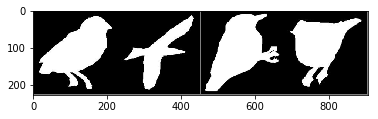

In [4]:
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline 
plt.ion() #Turn interactive mode on.

#scientific computing library for Python
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(testloader)
images, classes = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % dataset.classes[classes[j]] for j in range(4)))

#### Visualizing the dataset images

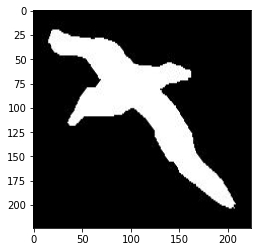

In [5]:
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline 
plt.ion() #Turn interactive mode on.

#scientific computing library for Python
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
image, class_ = dataset[0]

# print images
imshow(torchvision.utils.make_grid(image))

# Options

In [6]:
class options():
    def __init__(self):
        self.pretrained = True

opts = options()

# Alexnet network


In [7]:
#a neural networks library integrated with autograd functionality
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

class Net(nn.Module):
    
    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self, pretrained, num_classes = 250):
        super(Net, self).__init__()
        
        #features
        self.features = models.alexnet(pretrained=pretrained).features
        
        #classifier
        self.classifier = nn.Sequential(nn.Dropout(0.3), 
                                        nn.Linear(256*6*6, 512),
                                        nn.Dropout(0.3),
                                        nn.ReLU(),
                                        nn.Linear(512, num_classes))

    
    #defining the structure of the network
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

net = Net(pretrained=opts.pretrained, num_classes=len(dataset.classes))

#Printing the network architecture
print(net)


Net(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.3)
    (1): Linear(in_features=9216, out_features=512, bias=True)
    (2): Dropout(p=0.3)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=200, bias=T

In [8]:
#Printing the parameter values
params = list(net.parameters())
for name, param in net.named_parameters():
    print(name, param.shape) 

features.0.weight torch.Size([64, 3, 11, 11])
features.0.bias torch.Size([64])
features.3.weight torch.Size([192, 64, 5, 5])
features.3.bias torch.Size([192])
features.6.weight torch.Size([384, 192, 3, 3])
features.6.bias torch.Size([384])
features.8.weight torch.Size([256, 384, 3, 3])
features.8.bias torch.Size([256])
features.10.weight torch.Size([256, 256, 3, 3])
features.10.bias torch.Size([256])
classifier.1.weight torch.Size([512, 9216])
classifier.1.bias torch.Size([512])
classifier.4.weight torch.Size([200, 512])
classifier.4.bias torch.Size([200])


#### Forward Pass

In [9]:
input = torch.randn(1, 3, 224, 224)
out = net(input)
print(out)

tensor([[ 0.0426,  0.3672, -0.0363,  0.1008,  0.1084,  0.0241, -0.0040, -0.0843,
         -0.0315, -0.3720, -0.0436, -0.0406, -0.0891, -0.4129,  0.2229, -0.1003,
          0.3921, -0.1699, -0.2758, -0.1355, -0.1148,  0.3009,  0.1117,  0.0367,
          0.1479,  0.2352,  0.1693,  0.0048,  0.0585, -0.2166,  0.1845,  0.0736,
         -0.2897, -0.1253,  0.1755, -0.0306, -0.0487, -0.0537, -0.3342, -0.3001,
         -0.0665, -0.2824, -0.0223, -0.3414,  0.1193,  0.0821, -0.3642,  0.0894,
         -0.1888, -0.2585,  0.0852,  0.0157, -0.1999,  0.0508,  0.3479, -0.2059,
          0.4735, -0.0741,  0.0554,  0.1057, -0.0777, -0.3230, -0.1115,  0.1212,
          0.3788,  0.1465, -0.2153, -0.0189, -0.1814, -0.1423, -0.6033,  0.2213,
         -0.1231, -0.0990, -0.2652,  0.3131,  0.0959, -0.1752, -0.1500,  0.0980,
          0.1493,  0.2240, -0.0573,  0.1711,  0.3689,  0.2241, -0.0605,  0.1444,
          0.0383,  0.0163, -0.2337,  0.3546, -0.1404,  0.3625,  0.2303,  0.1156,
          0.0950,  0.2201,  

#### Backward Pass

In [10]:
net.zero_grad()
out.backward(torch.randn(1, 200))

#### Loss Function
In this example, we will use Classification Cross-Entropy loss and SGD with momentum.<br>
Cross Entropy loss is given as:- $L=-\sum_i y_i \log(p_i)$ and $p_i=\frac{\exp^{x_i}}{\sum_k \exp^{x_k}}$

There are many other loss functions such as MSELoss, L1Loss etc. Visit [here](http://pytorch.org/docs/master/nn.html#loss-functions) for other loss functions.

In [11]:
criterion = nn.CrossEntropyLoss()
print(criterion)

CrossEntropyLoss()



#### Stochastic Gradient Descent (SGD)
$$w_{n+1} = w_{n} - \eta \triangle$$
$$\triangle = 0.9\triangle + \frac{\partial L}{\partial w}$$

Although SGD is the most popular and basic optimizer that one should first try. There are many adaptive optimizers like Adagrad,Adadelta RMSProp and many more. Visit [here](http://pytorch.org/docs/master/optim.html) for other examples.

In [12]:
#an optimization package with standard optimization methods such as SGD, RMSProp, LBFGS, Adam etc.
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

#### Training in mini-batches

In [16]:
########################################################################
# Train the network
# ^^^^^^^^^^^^^^^^^^^^

def train(epoch, trainloader, optimizer, criterion):
    running_loss = 0.0
    
    net.train()
    
    for i, data in enumerate(tqdm(trainloader), 0):
        # get the inputs
        inputs, labels = data
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # addup loss
        running_loss += loss.item()

    print('epoch %d training loss: %.3f' %
            (epoch + 1, running_loss / (len(trainloader))))
    return running_loss / (len(trainloader))   

### Test Accuracy 

In [17]:
########################################################################
# Let us look at how the network performs on the test dataset.

def test(testloader, model):
    running_loss = 0.0
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data in tqdm(testloader):
            # get the inputs
            inputs, labels = data
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            # addup loss
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%, loss = %f' % (
                                    100 * correct / total, running_loss / len(testloader)))
    return running_loss / len(testloader)


In [18]:
import os
from tqdm import tqdm_notebook as tqdm
print('Start Training')
if not os.path.exists('./models'):
    os.mkdir('./models')

training_losses = []
testing_losses = []
num_epochs = 10

if torch.cuda.is_available():
    net = net.cuda()

for epoch in range(num_epochs):  # loop over the dataset multiple times
    print('epoch ', epoch + 1)
    train_loss = train(epoch, trainloader, optimizer, criterion)
    test_loss = test(testloader, net)
    torch.save(net.state_dict(), './models/model-'+str(epoch)+'.pth')
    
    training_losses.append(train_loss)
    testing_losses.append(test_loss)

print('Finished Training')



Start Training
epoch  1


torch.Size([4, 3, 224, 224])

epoch 1 training loss: 0.000



Accuracy of the network on the 10000 test images: 0 %, loss = nan
epoch  2


torch.Size([4, 3, 224, 224])

epoch 2 training loss: 0.000


KeyboardInterrupt: 

In [ ]:
#Plotting the training graph
plt.plot(range(len(training_losses)), training_losses, label="train")
plt.plot(range(len(testing_losses)), testing_losses, label="test")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()